<a href="https://colab.research.google.com/github/SunnyShrestha-repo/LearningML/blob/main/project3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook Setup

When you are done with this notebook, run the following code cell to unmount Google Drive

In [ ]:
from google.colab import drive
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')

All changes made in this colab session should now be visible in Drive.


# Begin Again This time with Instructions

The following code cell installs additional dependencies required to run the Jupyter Notebooks used in this class.

In [ ]:
# Add additional Python packages that we will be using in class
!apt install graphviz build-essential checkinstall imagemagick
# Base Python packages to run example Jupyter Notebooks
!pip install watermark pyprind mlxtend
# Python packages to visualize Decision Tree Classifiers
!pip install pydotplus graphviz pyparsing
# Python packages for Natrual Language Processing
!pip install nltk
# Python packages for Flask-based web applications
!pip install flask wtforms
# Python packages for TensorFlow
!pip install tensorflow tensorflow-datasets

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
graphviz is already the newest version (2.40.1-2).
The following additional packages will be installed:
  file fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagic-mgc libmagic1 libmagickcore-6.q16-3
  libmagickcore-6.q16-3-extra libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7
  netpbm poppler-data
Suggested packages:
  gettext fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr
  | lprng enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray
  radiance sane-utils texlive-base-bin transfig ufraw-batch inkscape
  libjxr-tools libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ip

The following code cell defines a variable equal to the location inside your Google Drive where you copied the ch03 folder

In [ ]:
##### TODO CHANGE THIS TO THE PATH IN GOOGLE DRIVE WHERE YOU COPIED THE ch13 FOLDER #####
machine_learning_root='/machine-learning'
current_chapter_root=machine_learning_root + '/project3'

In [ ]:
google_drive_mount_location = '/content/drive'
machine_learning_prefix=google_drive_mount_location + '/My Drive/' + machine_learning_root + '/'
current_chapter_prefix=google_drive_mount_location + '/My Drive/' + current_chapter_root + '/'

In [ ]:
google_drive_mount_location + machine_learning_root

'/content/drive/machine-learning'

The following code cell mounts your Google Drive into the runtime of the workbook, so that you can access files.

In [ ]:
# Read more here: https://colab.research.google.com/notebooks/io.ipynb#scrollTo=D78AM1fFt2ty
from google.colab import drive
drive.mount(google_drive_mount_location)

Mounted at /content/drive


Change our working directory to the path we have mounted Google Drive at so we can read/write files

In [ ]:
# Change our working directory to the path we have mounted Google Drive at so we can read/write files
import os
os.chdir(current_chapter_prefix)

In [ ]:
current_chapter_prefix

'/content/drive/My Drive//machine-learning/project3/'

Create a symlink to allow for resuable data when using TensorFlow Datasets

In [ ]:
# We are going to symlink /root/tensorflow_datasets to a location in our
# Google Drive mount so we can reuse downloads between runtimes
import os
import shutil

def rm_r(path):
    if os.path.isdir(path) and not os.path.islink(path):
        shutil.rmtree(path)
    elif os.path.exists(path) or os.path.islink(path):
        os.remove(path)

try:
  os.mkdir(machine_learning_prefix + 'tensorflow_datasets')
  print('Created ' + machine_learning_prefix + 'tensorflow_datasets directory')
except FileExistsError:
  # tensorflow_datasets folder already exists
  print(machine_learning_prefix + 'tensorflow_datasets directory already exists')

# Delete existing tensorflow_datasets folder
rm_r('/root/tensorflow_datasets')
print('Removed /root/tensorflow_datasets folder/symlink, if it existed')

# Create /root/tensorflow_datasets symlink, if needed
try:
  os.symlink(machine_learning_prefix + 'tensorflow_datasets', '/root/tensorflow_datasets')
  print('Created symlink from /root/tensorflow_datasets to ' + machine_learning_prefix + 'tensorflow_datasets')
except FileExistsError:
  # Symbolic link already exists, do nothing
  print('/root/tensorflow_datasets symbolic link already exists')

/content/drive/My Drive//machine-learning/tensorflow_datasets directory already exists
Removed /root/tensorflow_datasets folder/symlink, if it existed
Created symlink from /root/tensorflow_datasets to /content/drive/My Drive//machine-learning/tensorflow_datasets


Note that the optional watermark extension is a small IPython notebook plugin that I developed to make the code reproducible. You can just skip the following line(s).

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import PIL
import tensorflow_datasets as tfds


from IPython.display import Image
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


#DATA EXTRACTION AND PROCESSING

**DATASET:**

Location Image Classification
Source: https://www.kaggle.com/puneet6060/intel-image-classification?select=seg_test

The data set contains about 14034 images of 6 different locations like: street, buildings, glaciers, forest, mountain, and sea. Publicly available from Kaggle.

In [ ]:
import os
import sys
import tarfile
import time
import urllib.request
import zipfile

In [ ]:
# target = 'seg_test.zip'
target = 'seg_train.zip'

# if not os.path.isdir('seg_test'):
if not os.path.isdir('seg_train'):
    with zipfile.ZipFile(target, 'r') as tar:
        tar.extractall()

In [ ]:
import pathlib


imgdir_path = pathlib.Path('seg_train/')
# file_list = sorted([str(path) for path in imgdir_path.glob( '*.jpg')])

# print(file_list)

In [ ]:
imgdir_path

PosixPath('seg_train')

In [ ]:
testImgdir_path = pathlib.Path('seg_test/')

In [ ]:
class_names = ['street', 'sea', 'mountain', 'glacier', 'forest', 'buildings']

# {'buildings' -> 0,
# 'forest' -> 1,
# 'glacier' -> 2,
# 'mountain' -> 3,
# 'sea' -> 4,
# 'street' -> 5 }

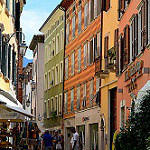

In [ ]:
street = list(imgdir_path.glob('street/*'))
PIL.Image.open(str(street[0]))

In [ ]:
import os
import pathlib
 
path = pathlib.Path('seg_train')
 
# create empty List
listOfFiles = list()
for(directory, subdirectories, file) in os.walk(path):
    # print(path)
    for f in file:
        if f.endswith('.jpg'):
          listOfFiles.append(os.path.join(directory,f))
 
# for file in listOfFiles:
#    print(file)
print(len(listOfFiles))

14034


In [ ]:
batch_size = 32
img_height = 150
img_width = 150

In [ ]:
imgdir_path

PosixPath('seg_test')

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  imgdir_path, 
  labels='inferred', 
  label_mode='int',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 14034 files belonging to 6 classes.
Using 11228 files for training.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


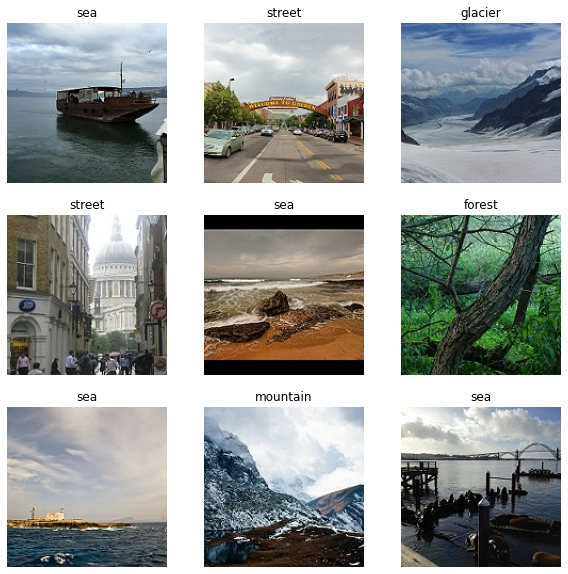

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 150, 150, 3)
(32,)


In [ ]:
(32, 150, 150, 3)
(32, 6)

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(labels_batch)
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

tf.Tensor([4 0 5 5 5 5 4 5 4 0 1 4 0 0 5 0 1 1 3 1 1 4 5 2 0 4 0 3 5 0 1 3], shape=(32,), dtype=int32)
0.0 1.0


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  imgdir_path, 
  labels='inferred', 
  label_mode='int',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 14034 files belonging to 6 classes.
Using 2806 files for validation.


In [ ]:
normalized_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(labels_batch)
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

tf.Tensor([3 3 3 3 0 5 2 0 0 2 5 1 1 5 3 4 4 3 4 4 2 4 3 5 5 4 1 5 5 1 5 5], shape=(32,), dtype=int32)
0.0 1.0


In [ ]:
val_ds

<BatchDataset shapes: ((None, 150, 150, 3), (None,)), types: (tf.float32, tf.int32)>

**FOR TESTING LATER**

In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  testImgdir_path, 
  labels='inferred', 
  label_mode='int',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3000 files belonging to 6 classes.
Using 600 files for validation.


In [ ]:
normalized_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.8862746


In [ ]:
valTest_ds = tf.keras.utils.image_dataset_from_directory(
  testImgdir_path, 
  labels='inferred', 
  label_mode='categorical',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3000 files belonging to 6 classes.
Using 600 files for validation.


In [ ]:
normalized_ds = valTest_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.8862746


#TensorFlow model creation

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Conv2D(
        64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Conv2D(
        128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(
        256, (3, 3), padding='same', activation='relu'),
])

In [ ]:
model.compute_output_shape(input_shape=(16, 150, 150, 3))

TensorShape([16, 18, 18, 256])

In [ ]:
model.add(tf.keras.layers.Flatten())
    
model.compute_output_shape(input_shape=(16, 28, 28, 1))

TensorShape([16, 2304])

In [ ]:
# model.add(tf.keras.layers.Dense(
#     units=1024, name='fc_1', 
#     activation='relu'))

# model.add(tf.keras.layers.Dropout(
#     rate=0.5))
    
model.add(tf.keras.layers.Dense(
    units=6, name='fc_2',
    activation='softmax'))

In [ ]:
tf.random.set_seed(1)
model.build(input_shape=(None, 150, 150, 3))

model.compute_output_shape(input_shape=(None, 150, 150, 3))

TensorShape([None, 6])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 75, 75, 32)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 37, 37, 64)       

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 32
NUM_EPOCHS = 20

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) # same as `tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')`

history = model.fit(train_ds, epochs=NUM_EPOCHS, 
                    validation_data=val_ds, 
                    shuffle=True)

Epoch 1/20


KeyboardInterrupt: ignored

In [ ]:
train_ds

<BatchDataset shapes: ((None, 150, 150, 3), (None,)), types: (tf.float32, tf.int32)>

In [ ]:
import os

if not os.path.exists('models'):
    os.mkdir('models')


model.save('models/locationIdentify80.h5')

WARNING:tensorflow:Model was constructed with shape (None, 4) for input KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name='dense_6_input'), name='dense_6_input', description="created by layer 'dense_6_input'"), but it was called on an input with incompatible shape (None, 150, 150, 3).

#TensorFlow Estimator 

In [ ]:
my_estimator = tf.keras.estimator.model_to_estimator(
    keras_model=model,
    model_dir='models/estimator-for-XOR/')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using the Keras model provided.
INFO:tensorflow:Using config: {'_model_dir': 'models/estimator-for-XOR/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
normalized_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(labels_batch)
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

tf.Tensor([2 0 4 1 5 4 3 2 4 0 3 1 4 5 5 4 3 4 5 5 0 5 1 1 5 4 1 5 4 0 4 2], shape=(32,), dtype=int32)
0.0 0.8862746


In [ ]:
test_results = my_estimator.evaluate(test_ds.batch(20))
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

INFO:tensorflow:Could not find trained model in model_dir: models/estimator-for-XOR/, running initialization to evaluate.


TypeError: ignored

#Plot

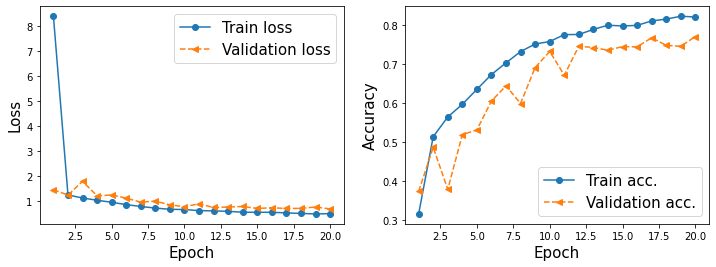

In [ ]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

plt.savefig('locationsLossNVal.png', dpi=300)
plt.show()

# Image classification from horse vs. humans images using CNN


### Loading the CelebA dataset

In [ ]:
# gcs_base_dir = "gs://horses_or_humans/"
# gcs_base_dir = "gs://celeb_a_dataset/"
# celeba_bldr = tfds.builder("celeb_a", data_dir=gcs_base_dir, version='2.0.0')
# celeba_bldr.download_and_prepare()
# celeba = celeba_bldr.as_dataset(shuffle_files=False)
# print(celeba.keys())

# celeba_train = celeba['train']
# celeba_valid = celeba['validation']
# celeba_test = celeba['test']

def count_items(ds):
    n = 0
    for _ in ds:
        n += 1
    return n

print('Train set:  {}'.format(count_items(train_ds)))
print('Validation: {}'.format(count_items(val_ds)))
print('Test set:   {}'.format(count_items(test_ds)))

Train set:  750
Validation: 19
Test set:   0


In [ ]:
# celeba_train = celeba_train.take(25000)
# celeba_valid = celeba_valid.take(5000)

print('Train set:  {}'.format(count_items(train_ds)))
print('Validation: {}'.format(count_items(val_ds)))

NameError: ignored

### Image transformation and data augmentation

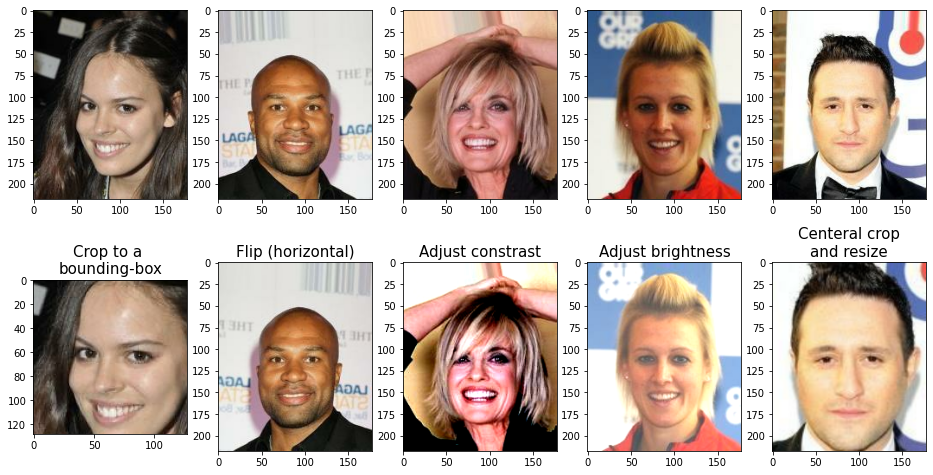

In [ ]:
## take 5 examples:
examples = []
for example in celeba_train.take(5):
    examples.append(example['image'])

fig = plt.figure(figsize=(16, 8.5))

## Column 1: cropping to a bounding-box
ax = fig.add_subplot(2, 5, 1)
ax.imshow(examples[0])
ax = fig.add_subplot(2, 5, 6)
ax.set_title('Crop to a \nbounding-box', size=15)
img_cropped = tf.image.crop_to_bounding_box(
    examples[0], 50, 20, 128, 128)
ax.imshow(img_cropped)

## Column 2: flipping (horizontally)
ax = fig.add_subplot(2, 5, 2)
ax.imshow(examples[1])
ax = fig.add_subplot(2, 5, 7)
ax.set_title('Flip (horizontal)', size=15)
img_flipped = tf.image.flip_left_right(examples[1])
ax.imshow(img_flipped)

## Column 3: adjust contrast
ax = fig.add_subplot(2, 5, 3)
ax.imshow(examples[2])
ax = fig.add_subplot(2, 5, 8)
ax.set_title('Adjust constrast', size=15)
img_adj_contrast = tf.image.adjust_contrast(
    examples[2], contrast_factor=2)
ax.imshow(img_adj_contrast)

## Column 4: adjust brightness
ax = fig.add_subplot(2, 5, 4)
ax.imshow(examples[3])
ax = fig.add_subplot(2, 5, 9)
ax.set_title('Adjust brightness', size=15)
img_adj_brightness = tf.image.adjust_brightness(
    examples[3], delta=0.3)
ax.imshow(img_adj_brightness)

## Column 5: cropping from image center 
ax = fig.add_subplot(2, 5, 5)
ax.imshow(examples[4])
ax = fig.add_subplot(2, 5, 10)
ax.set_title('Centeral crop\nand resize', size=15)
img_center_crop = tf.image.central_crop(
    examples[4], 0.7)
img_resized = tf.image.resize(
    img_center_crop, size=(218, 178))
ax.imshow(img_resized.numpy().astype('uint8'))

# plt.savefig('figures/15_14.png', dpi=300)
plt.show()

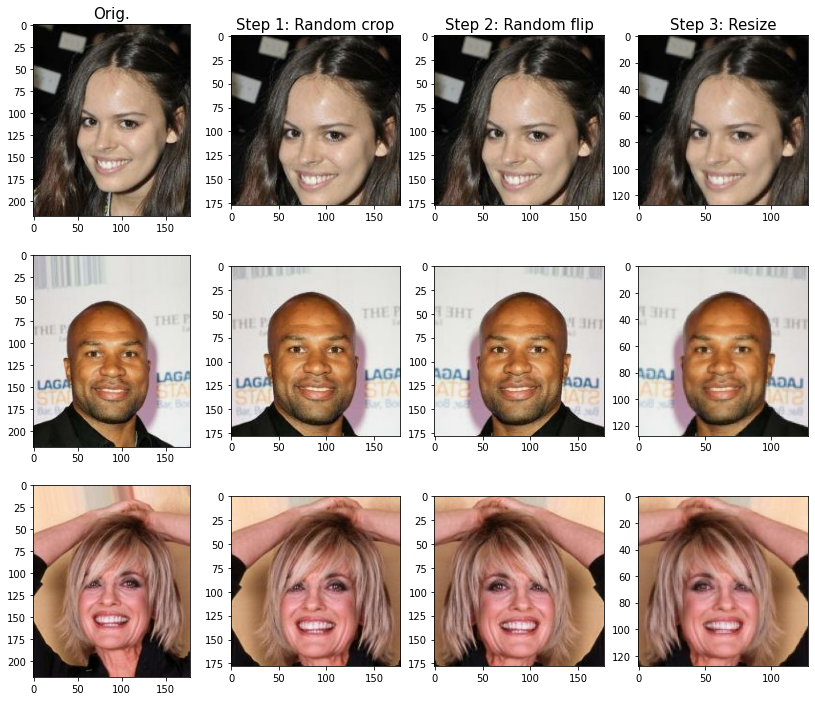

In [ ]:
tf.random.set_seed(1)

fig = plt.figure(figsize=(14, 12))

for i,example in enumerate(celeba_train.take(3)):
    image = example['image']

    ax = fig.add_subplot(3, 4, i*4+1)
    ax.imshow(image)
    if i == 0:
        ax.set_title('Orig.', size=15)

    ax = fig.add_subplot(3, 4, i*4+2)
    img_crop = tf.image.random_crop(image, size=(178, 178, 3))
    ax.imshow(img_crop)
    if i == 0:
        ax.set_title('Step 1: Random crop', size=15)

    ax = fig.add_subplot(3, 4, i*4+3)
    img_flip = tf.image.random_flip_left_right(img_crop)
    ax.imshow(tf.cast(img_flip, tf.uint8))
    if i == 0:
        ax.set_title('Step 2: Random flip', size=15)

    ax = fig.add_subplot(3, 4, i*4+4)
    img_resize = tf.image.resize(img_flip, size=(128, 128))
    ax.imshow(tf.cast(img_resize, tf.uint8))
    if i == 0:
        ax.set_title('Step 3: Resize', size=15)

# plt.savefig('figures/15_15.png', dpi=300)
plt.show()

In [ ]:
def preprocess(example, size=(64, 64), mode='train'):
    image = example['image']
    label = example['attributes']['Mustache']
    if mode == 'train':
        image_cropped = tf.image.random_crop(
            image, size=(178, 178, 3))
        image_resized = tf.image.resize(
            image_cropped, size=size)
        image_flip = tf.image.random_flip_left_right(
            image_resized)
        return (image_flip/255.0, tf.cast(label, tf.int32))
    
    else:
        image_cropped = tf.image.crop_to_bounding_box(
            image, offset_height=20, offset_width=0,
            target_height=178, target_width=178)
        image_resized = tf.image.resize(
            image_cropped, size=size)
        return (image_resized/255.0, tf.cast(label, tf.int32))

# testing:
item = next(iter(celeba_train))
preprocess(item, mode='train')

(<tf.Tensor: shape=(64, 64, 3), dtype=float32, numpy=
 array([[[0.08799019, 0.08841912, 0.07928921],
         [0.0507171 , 0.0507171 , 0.0507171 ],
         [0.04380074, 0.04380074, 0.04380074],
         ...,
         [0.0213848 , 0.0213848 , 0.0213848 ],
         [0.01832108, 0.01832108, 0.01832108],
         [0.01525735, 0.01525735, 0.01525735]],
 
        [[0.03651961, 0.03694853, 0.02781863],
         [0.01733398, 0.01733398, 0.01733398],
         [0.01746324, 0.01746324, 0.01746324],
         ...,
         [0.0213848 , 0.02401961, 0.00827206],
         [0.01832108, 0.02095588, 0.00520833],
         [0.01525735, 0.01789216, 0.00243279]],
 
        [[0.02119045, 0.01802524, 0.01531863],
         [0.02469554, 0.01638997, 0.01703431],
         [0.01685911, 0.01960784, 0.02745098],
         ...,
         [0.0213848 , 0.0213848 , 0.01944125],
         [0.01832108, 0.01832108, 0.01691368],
         [0.01525735, 0.01525735, 0.01143727]],
 
        ...,
 
        [[0.12848212, 0.1023179 , 

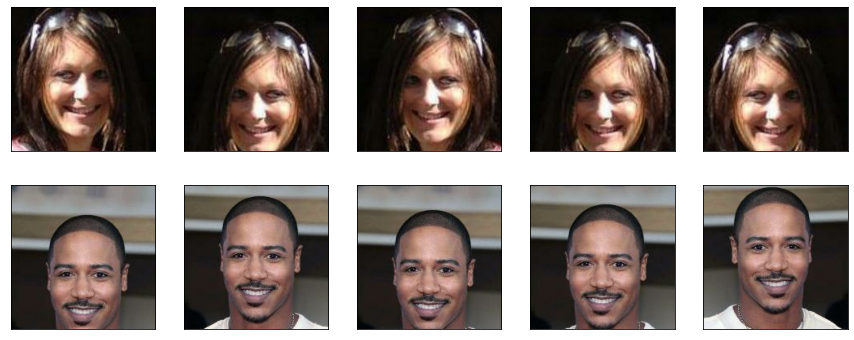

In [ ]:
tf.random.set_seed(1)

ds = celeba_train.shuffle(1000, reshuffle_each_iteration=False)
ds = ds.take(2).repeat(5)

ds = ds.map(lambda x:preprocess(x, size=(178, 178), mode='train'))

fig = plt.figure(figsize=(15, 6))
for j,example in enumerate(ds):
    ax = fig.add_subplot(2, 5, j//2+(j%2)*5+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(example[0])
    
# plt.savefig('images/moustache.png', dpi=300)
plt.show()

In [ ]:
BATCH_SIZE = 32
BUFFER_SIZE = 1000
IMAGE_SIZE = (64, 64)
steps_per_epoch = np.ceil(16000/BATCH_SIZE)
print(steps_per_epoch)

ds_train = celeba_train.map(
    lambda x: preprocess(x, size=IMAGE_SIZE, mode='train'))
ds_train = ds_train.shuffle(buffer_size=BUFFER_SIZE).repeat()
ds_train = ds_train.batch(BATCH_SIZE)

ds_valid = celeba_valid.map(
    lambda x: preprocess(x, size=IMAGE_SIZE, mode='eval'))
ds_valid = ds_valid.batch(BATCH_SIZE)

500.0


### Training a CNN eyeglasses classifier

* **Global Average Pooling**

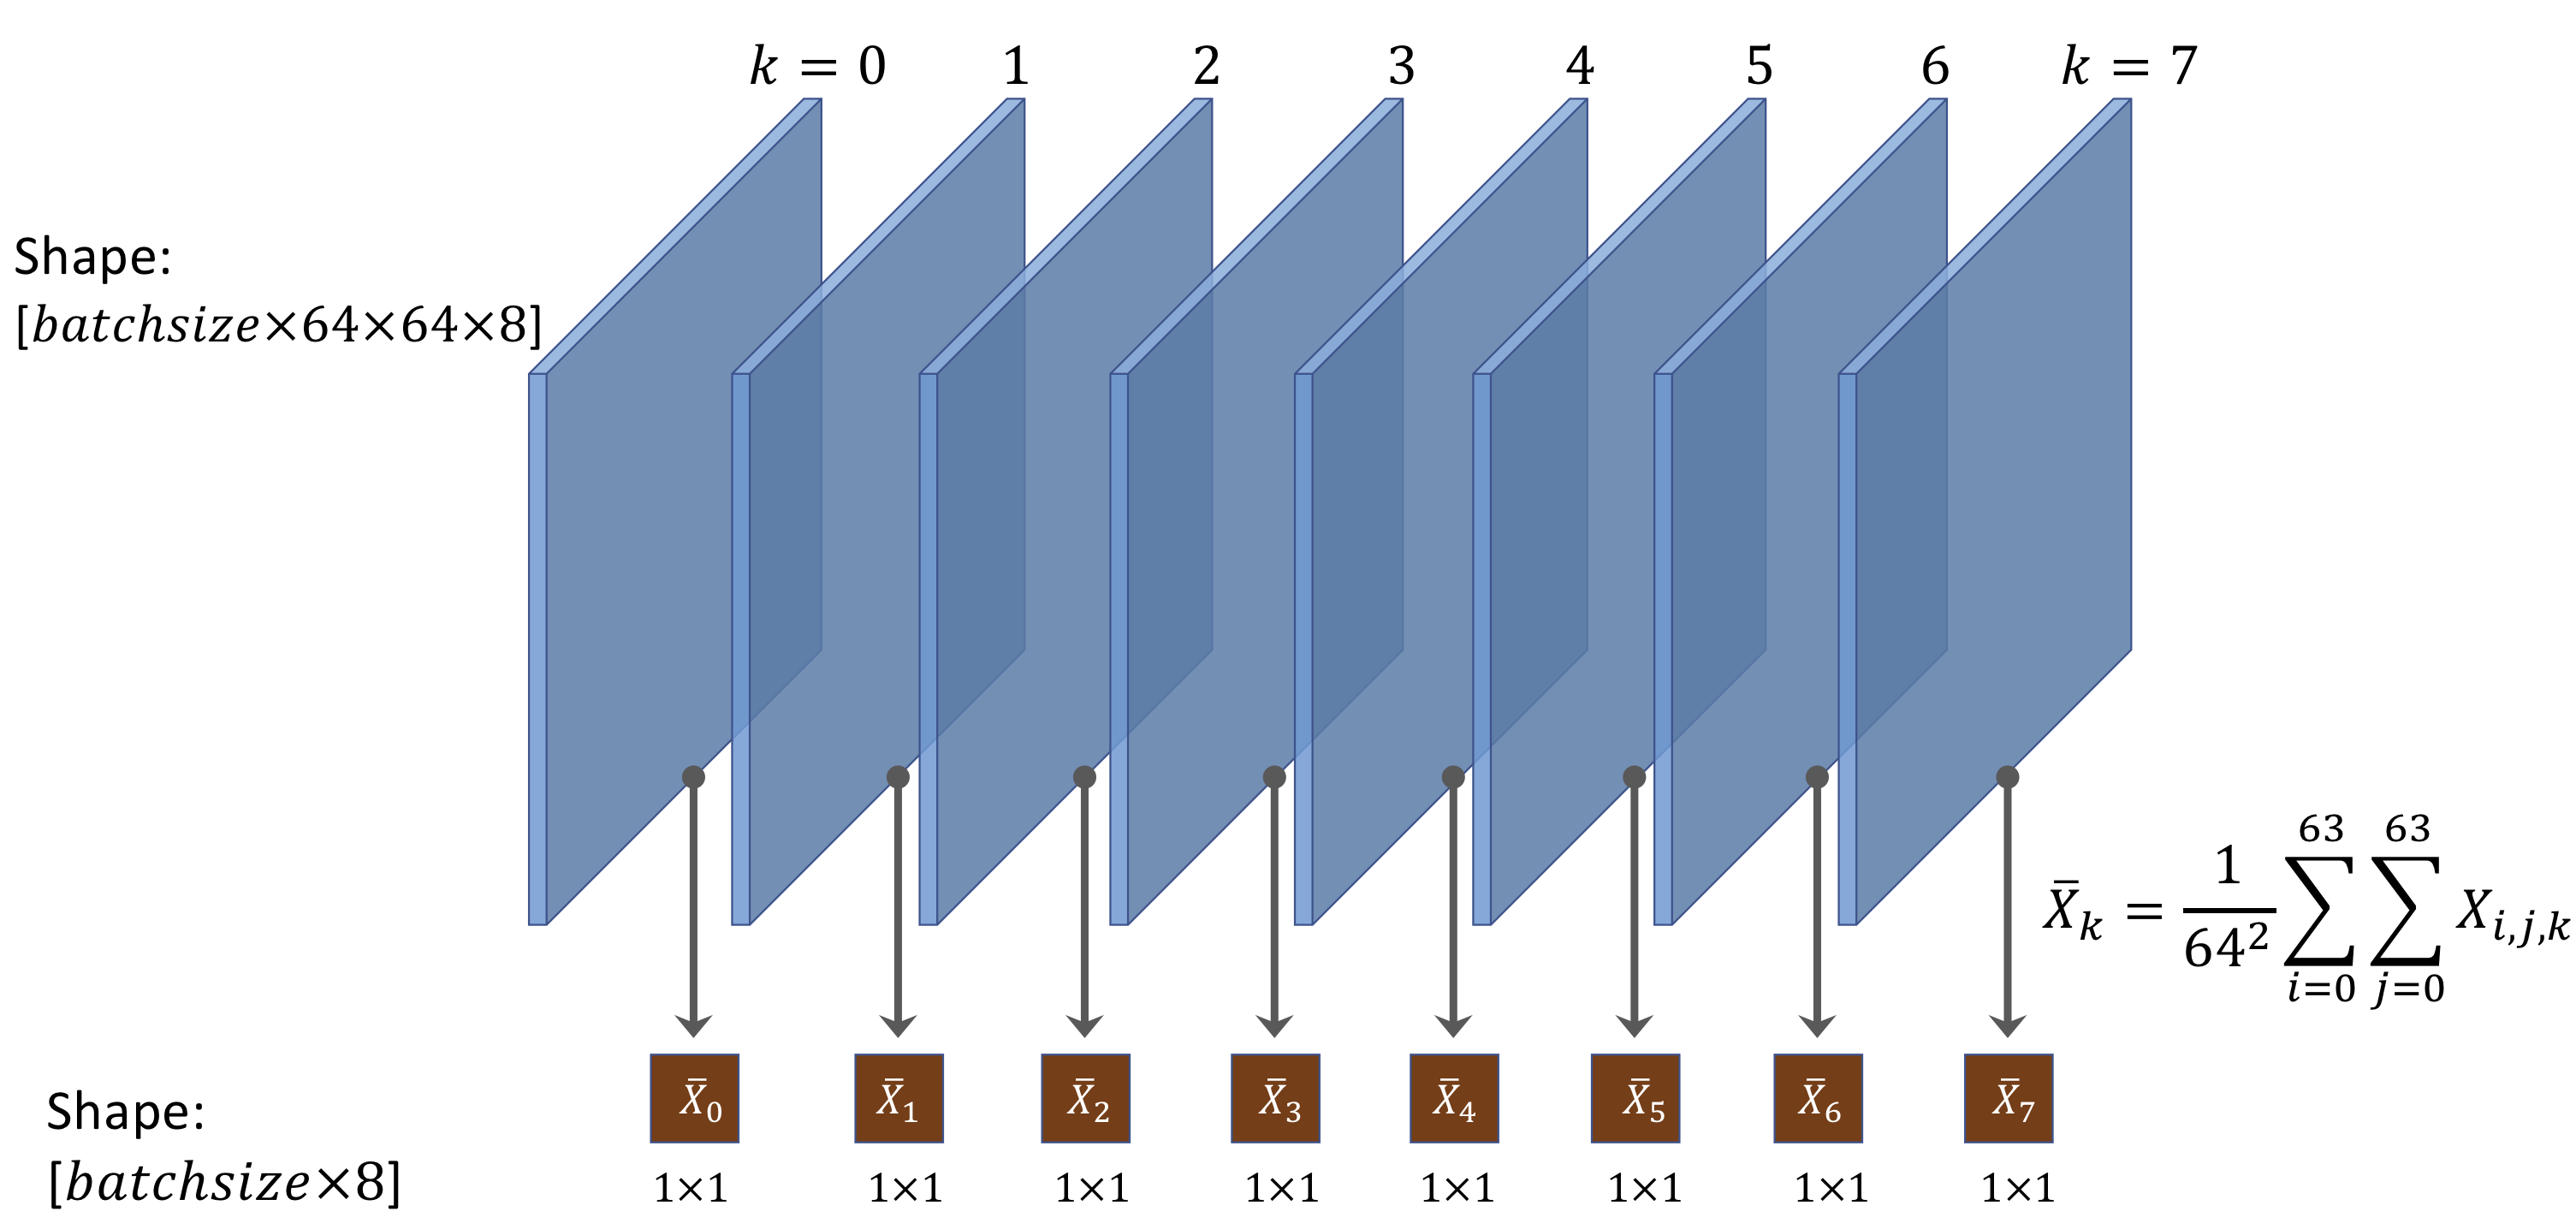

In [ ]:
Image(filename='images/15_13.png', width=800)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Conv2D(
        64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Conv2D(
        128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(
        256, (3, 3), padding='same', activation='relu'),
])

In [ ]:
model.compute_output_shape(input_shape=(None, 64, 64, 3))

TensorShape([None, 8, 8, 256])

In [ ]:
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.compute_output_shape(input_shape=(None, 64, 64, 3))

TensorShape([None, 256])

In [ ]:
model.add(tf.keras.layers.Dense(1, activation=None))

In [ ]:
tf.random.set_seed(1)

model.build(input_shape=(None, 64, 64, 3))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)       

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

# history = model.fit(ds_train, validation_data=ds_valid, 
#                     epochs=20, steps_per_epoch=steps_per_epoch)

# Updating epochs to get a better training
history = model.fit(train_ds, validation_data=val_ds, 
                    epochs=50, steps_per_epoch=steps_per_epoch)


NameError: ignored

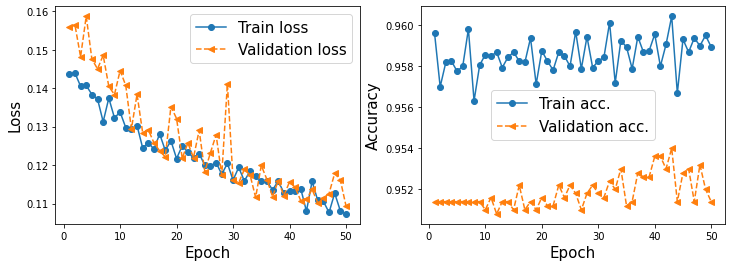

In [ ]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

# plt.savefig('images/loss.png', dpi=300)
plt.show()

In [ ]:
ds_test = celeba_test.map(
    lambda x:preprocess(x, size=IMAGE_SIZE, mode='eval')).batch(32)
results = model.evaluate(ds_test, verbose=0)
print('Test Acc: {:.2f}%'.format(results[1]*100))

Test Acc: 96.13%


In [ ]:
history = model.fit(ds_train, validation_data=ds_valid, 
                    epochs=30, initial_epoch=20,
                    steps_per_epoch=steps_per_epoch)

Epoch 21/30
500/500 [==============================] - 24s 45ms/step - loss: 0.1400 - accuracy: 0.9593 - val_loss: 0.1549 - val_accuracy: 0.9550
Epoch 22/30
500/500 [==============================] - 24s 48ms/step - loss: 0.1387 - accuracy: 0.9594 - val_loss: 0.1416 - val_accuracy: 0.9550
Epoch 23/30
500/500 [==============================] - 24s 49ms/step - loss: 0.1362 - accuracy: 0.9594 - val_loss: 0.1501 - val_accuracy: 0.9550
Epoch 24/30
500/500 [==============================] - 23s 47ms/step - loss: 0.1341 - accuracy: 0.9591 - val_loss: 0.1400 - val_accuracy: 0.9550
Epoch 25/30
500/500 [==============================] - 24s 49ms/step - loss: 0.1338 - accuracy: 0.9592 - val_loss: 0.1368 - val_accuracy: 0.9550
Epoch 26/30
500/500 [==============================] - 25s 49ms/step - loss: 0.1338 - accuracy: 0.9594 - val_loss: 0.1351 - val_accuracy: 0.9540
Epoch 27/30
500/500 [==============================] - 24s 48ms/step - loss: 0.1298 - accuracy: 0.9596 - val_loss: 0.1372 - val_ac

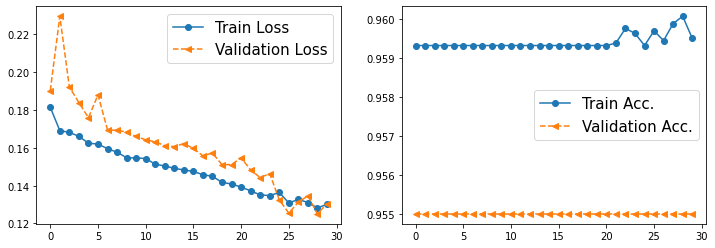

In [ ]:
hist2 = history.history
x_arr = np.arange(len(hist['loss'] + hist2['loss']))


fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss']+hist2['loss'], 
        '-o', label='Train Loss')
ax.plot(x_arr, hist['val_loss']+hist2['val_loss'],
        '--<', label='Validation Loss')
ax.legend(fontsize=15)


ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy']+hist2['accuracy'], 
        '-o', label='Train Acc.')
ax.plot(x_arr, hist['val_accuracy']+hist2['val_accuracy'], 
        '--<', label='Validation Acc.')
ax.legend(fontsize=15)
plt.show()

In [ ]:
ds_test = celeba_test.map(
    lambda x:preprocess(x, size=IMAGE_SIZE, mode='eval')).batch(32)
results = model.evaluate(ds_test, verbose=0)
print('Test Acc: {:.2f}%'.format(results[1]*100))

Test Acc: 96.13%


[[-8.032984 ]
 [-4.4509816]
 [-2.9587893]
 [-2.957742 ]
 [-4.977552 ]
 [-3.1774468]
 [-3.59069  ]
 [-3.6361287]
 [-3.6319685]
 [-2.6659734]]


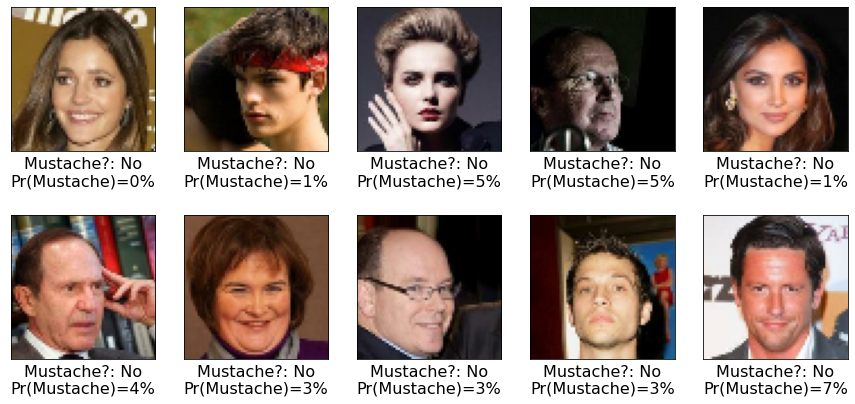

In [ ]:
ds = ds_test.unbatch().take(10)

pred_logits = model.predict(ds.batch(10))
print(pred_logits)
probas = tf.sigmoid(pred_logits)
probas = probas.numpy().flatten()*100

fig = plt.figure(figsize=(15, 7))
for j,example in enumerate(ds):
    ax = fig.add_subplot(2, 5, j+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0])
    if example[1].numpy() == 1:
        label='Yes'
    else:
        label = 'No'
    ax.text(
        0.5, -0.15, 
        'Mustache?: {:s}\nPr(Mustache)={:.0f}%'.format(label, probas[j]), 
        size=16, 
        horizontalalignment='center',
        verticalalignment='center', 
        transform=ax.transAxes)
plt.show()

In [ ]:
model.save('models/celeba-cnn.h5')

...


## Summary

...



## Appendix:

### The effect of initial shuffling

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd


## MNIST dataset
#datasets = tfds.load(name='mnist')
mnist_bldr = tfds.builder('mnist')
mnist_bldr.download_and_prepare()
datasets = mnist_bldr.as_dataset(shuffle_files=False)
mnist_train_orig, mnist_test_orig = datasets['train'], datasets['test']


mnist_train = mnist_train_orig.map(
    lambda item: (tf.cast(item['image'], tf.float32)/255.0, 
                  tf.cast(item['label'], tf.int32)))

mnist_test = mnist_test_orig.map(
    lambda item: (tf.cast(item['image'], tf.float32)/255.0, 
                  tf.cast(item['label'], tf.int32)))

tf.random.set_seed(1)

mnist_train = mnist_train.shuffle(buffer_size=10000,
                                  reshuffle_each_iteration=False)

mnist_valid = mnist_train.take(100)#.batch(BATCH_SIZE)
mnist_train = mnist_train.skip(100)#.batch(BATCH_SIZE)

**Notice that count-of-labels in mnist_valid did not stay the same when the dataset is loaded with using Builder and specifying `mnist_bldr.as_dataset(shuffle_files=False)`**

In [ ]:
from collections import Counter

def count_labels(ds):
    counter = Counter()
    for example in ds:
        counter.update([example[1].numpy()])
    return counter
    
print('Count of labels:', count_labels(mnist_valid))
print('Count of labels:', count_labels(mnist_valid))

Count of labels: Counter({7: 19, 9: 14, 6: 13, 5: 11, 4: 11, 0: 8, 2: 7, 3: 7, 1: 5, 8: 5})
Count of labels: Counter({7: 19, 9: 14, 6: 13, 5: 11, 4: 11, 0: 8, 2: 7, 3: 7, 1: 5, 8: 5})


In [ ]:
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd


## MNIST dataset
datasets = tfds.load(name='mnist')
#mnist_bldr = tfds.builder('mnist')
#mnist_bldr.download_and_prepare()
#datasets = mnist_bldr.as_dataset(shuffle_files=False)
mnist_train_orig, mnist_test_orig = datasets['train'], datasets['test']


mnist_train = mnist_train_orig.map(
    lambda item: (tf.cast(item['image'], tf.float32)/255.0, 
                  tf.cast(item['label'], tf.int32)))

mnist_test = mnist_test_orig.map(
    lambda item: (tf.cast(item['image'], tf.float32)/255.0, 
                  tf.cast(item['label'], tf.int32)))

tf.random.set_seed(1)

mnist_train = mnist_train.shuffle(buffer_size=10000,
                                  reshuffle_each_iteration=False)

mnist_valid = mnist_train.take(100)#.batch(BATCH_SIZE)
mnist_train = mnist_train.skip(100)#.batch(BATCH_SIZE)

**Notice that count-of-labels in mnist_valid did not stay the same when the dataset is loaded with `tfds.load()`**

In [ ]:
from collections import Counter

def count_labels(ds):
    counter = Counter()
    for example in ds:
        counter.update([example[1].numpy()])
    return counter
    
print('Count of labels:', count_labels(mnist_valid))
print('Count of labels:', count_labels(mnist_valid))

Count of labels: Counter({7: 19, 9: 14, 6: 13, 5: 11, 4: 11, 0: 8, 2: 7, 3: 7, 1: 5, 8: 5})
Count of labels: Counter({7: 19, 9: 14, 6: 13, 5: 11, 4: 11, 0: 8, 2: 7, 3: 7, 1: 5, 8: 5})
